# Dividing stocks into groups with similar characteristics can help in portfolio construction to ensure we choose a universe of stocks with sufficient diversification between them. Below I take S&P 500 data and using k-means seperate them into clusters. From there I take the stock with the highest sharpe ratio in each cluster and make it into my stock portfolio

In [175]:
import panel as pn
pn.extension('plotly')
#import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

In [9]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import scipy
from pandas_datareader import data
from sklearn.cluster import KMeans

In [226]:
sp500_list = si.tickers_sp500()
dow_list = si.tickers_dow()

In [228]:
print("Tickers in SP 500:", len(sp500_list))
small_list= sp500_list[0:100]
medium_list = sp500_list[0:250]
full_list = sp500_list[0:505]
medium_2 = sp500_list[0:350]

Tickers in SP 500: 505


In [14]:
#sp500_historical data pull

In [394]:
sp500_historical_1 = pd.DataFrame()
for ticker in full_list:
    sp500_historical_1 = sp500_historical_1.append(si.get_data(ticker, start_date="07/01/2020", end_date="07/01/2021", interval="1d"))

In [395]:
sp500_historical_1

,open,high,low,close,adjclose,volume,ticker
2020-07-01,88.889999,88.889999,87.300003,88.110001,87.558922,1137000,A
2020-07-02,88.830002,89.489998,88.550003,88.680000,88.125351,1507700,A
2020-07-06,89.019997,90.639999,89.019997,89.309998,88.751419,1412200,A
2020-07-07,88.839996,90.040001,88.669998,89.209999,88.652039,1441700,A
2020-07-08,89.519997,90.330002,89.129997,89.540001,88.979973,1069600,A
...,...,...,...,...,...,...,...
2021-06-24,186.919998,187.369995,184.979996,185.380005,185.145737,1686000,ZTS
2021-06-25,185.500000,187.289993,184.500000,187.229996,186.993393,1994900,ZTS
2021-06-28,187.339996,187.929993,185.639999,187.080002,186.843582,1386100,ZTS
2021-06-29,187.089996,188.190002,186.089996,187.990005,187.752441,853900,ZTS


In [84]:
sp500_historical_250 = pd.DataFrame()
for ticker in medium_list:
    sp500_historical_250 = sp500_historical_250.append(si.get_data(ticker, start_date="01/01/2020", end_date="01/10/2021", interval="1d"))

In [163]:
sp500_historical_250.head()

,open,high,low,close,adjclose,volume,ticker
2020-01-02,85.900002,86.349998,85.199997,85.949997,85.017082,1410500,A
2020-01-03,84.669998,85.330002,84.500000,84.570000,83.652077,1118300,A
2020-01-06,84.000000,84.820000,83.599998,84.820000,83.899353,1993200,A
2020-01-07,83.959999,85.260002,83.940002,85.080002,84.156532,1684700,A
2020-01-08,85.959999,86.470001,85.199997,85.919998,84.987411,1847600,A


In [396]:
test_df = sp500_historical_250.copy()
test_df.head()

,open,high,low,close,adjclose,volume,ticker
2020-01-02,85.900002,86.349998,85.199997,85.949997,85.017082,1410500,A
2020-01-03,84.669998,85.330002,84.500000,84.570000,83.652077,1118300,A
2020-01-06,84.000000,84.820000,83.599998,84.820000,83.899353,1993200,A
2020-01-07,83.959999,85.260002,83.940002,85.080002,84.156532,1684700,A
2020-01-08,85.959999,86.470001,85.199997,85.919998,84.987411,1847600,A


In [397]:
del test_df['open'], test_df['high'], test_df['low'], test_df['adjclose'],test_df['volume']

In [398]:
new_df = test_df.pivot(values = 'close', columns = 'ticker')
new_df.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J
2020-01-02,85.949997,29.090000,159.410004,75.087502,89.550003,85.080002,168.809998,86.949997,210.149994,334.429993,...,22.709999,146.479996,156.410004,36.880001,30.410000,597.260010,156.039993,181.679993,17.990000,90.269997
2020-01-03,84.570000,27.650000,159.419998,74.357498,88.699997,84.010002,166.820007,85.889999,209.800003,331.809998,...,22.730000,141.820007,154.190002,36.720001,30.639999,593.340027,155.979996,179.110001,17.670000,90.889999
2020-01-06,84.820000,27.320000,156.800003,74.949997,89.400002,85.239998,179.039993,86.339996,208.429993,333.709991,...,22.930000,143.270004,155.000000,36.279999,31.170000,595.760010,158.860001,178.539993,17.790001,90.720001
2020-01-07,85.080002,27.219999,154.940002,74.597504,88.889999,84.629997,180.350006,85.860001,203.929993,333.390015,...,22.980000,144.100006,156.800003,36.009998,30.980000,582.799988,156.580002,177.809998,17.760000,91.040001
2020-01-08,85.919998,27.840000,153.160004,75.797501,89.519997,85.449997,178.690002,86.209999,204.330002,337.869995,...,23.040001,144.050003,157.600006,35.750000,30.950001,581.780029,158.649994,178.740005,17.820000,89.480003


In [399]:
returns = new_df.pct_change().mean() * (10*12)
std = new_df.pct_change().std() * np.sqrt((10*12))

In [400]:
kmeans_df = pd.concat([returns, std], axis = 1).dropna()
kmeans_df.columns = ["Returns","Standard Deviation"]
kmeans_df = kmeans_df.dropna()

In [401]:
kmeans_df.head()

,Returns,Standard Deviation
ticker,,
A,0.214164,0.251302
AAL,-0.062374,0.713758
AAP,0.082478,0.320451
AAPL,0.315405,0.321486
ABBV,0.112797,0.238342


In [402]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [403]:
#finding elbow curve
inertia = []
k = list(range(1,25))
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(kmeans_df)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x = 'k', y = 'inertia', title = 'Elbow Curve', xticks = k)

:Curve   [k]   (inertia)

### We see the drop off at around 5, so we will choose that as our number of clusters

In [404]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, n_jobs=-1)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

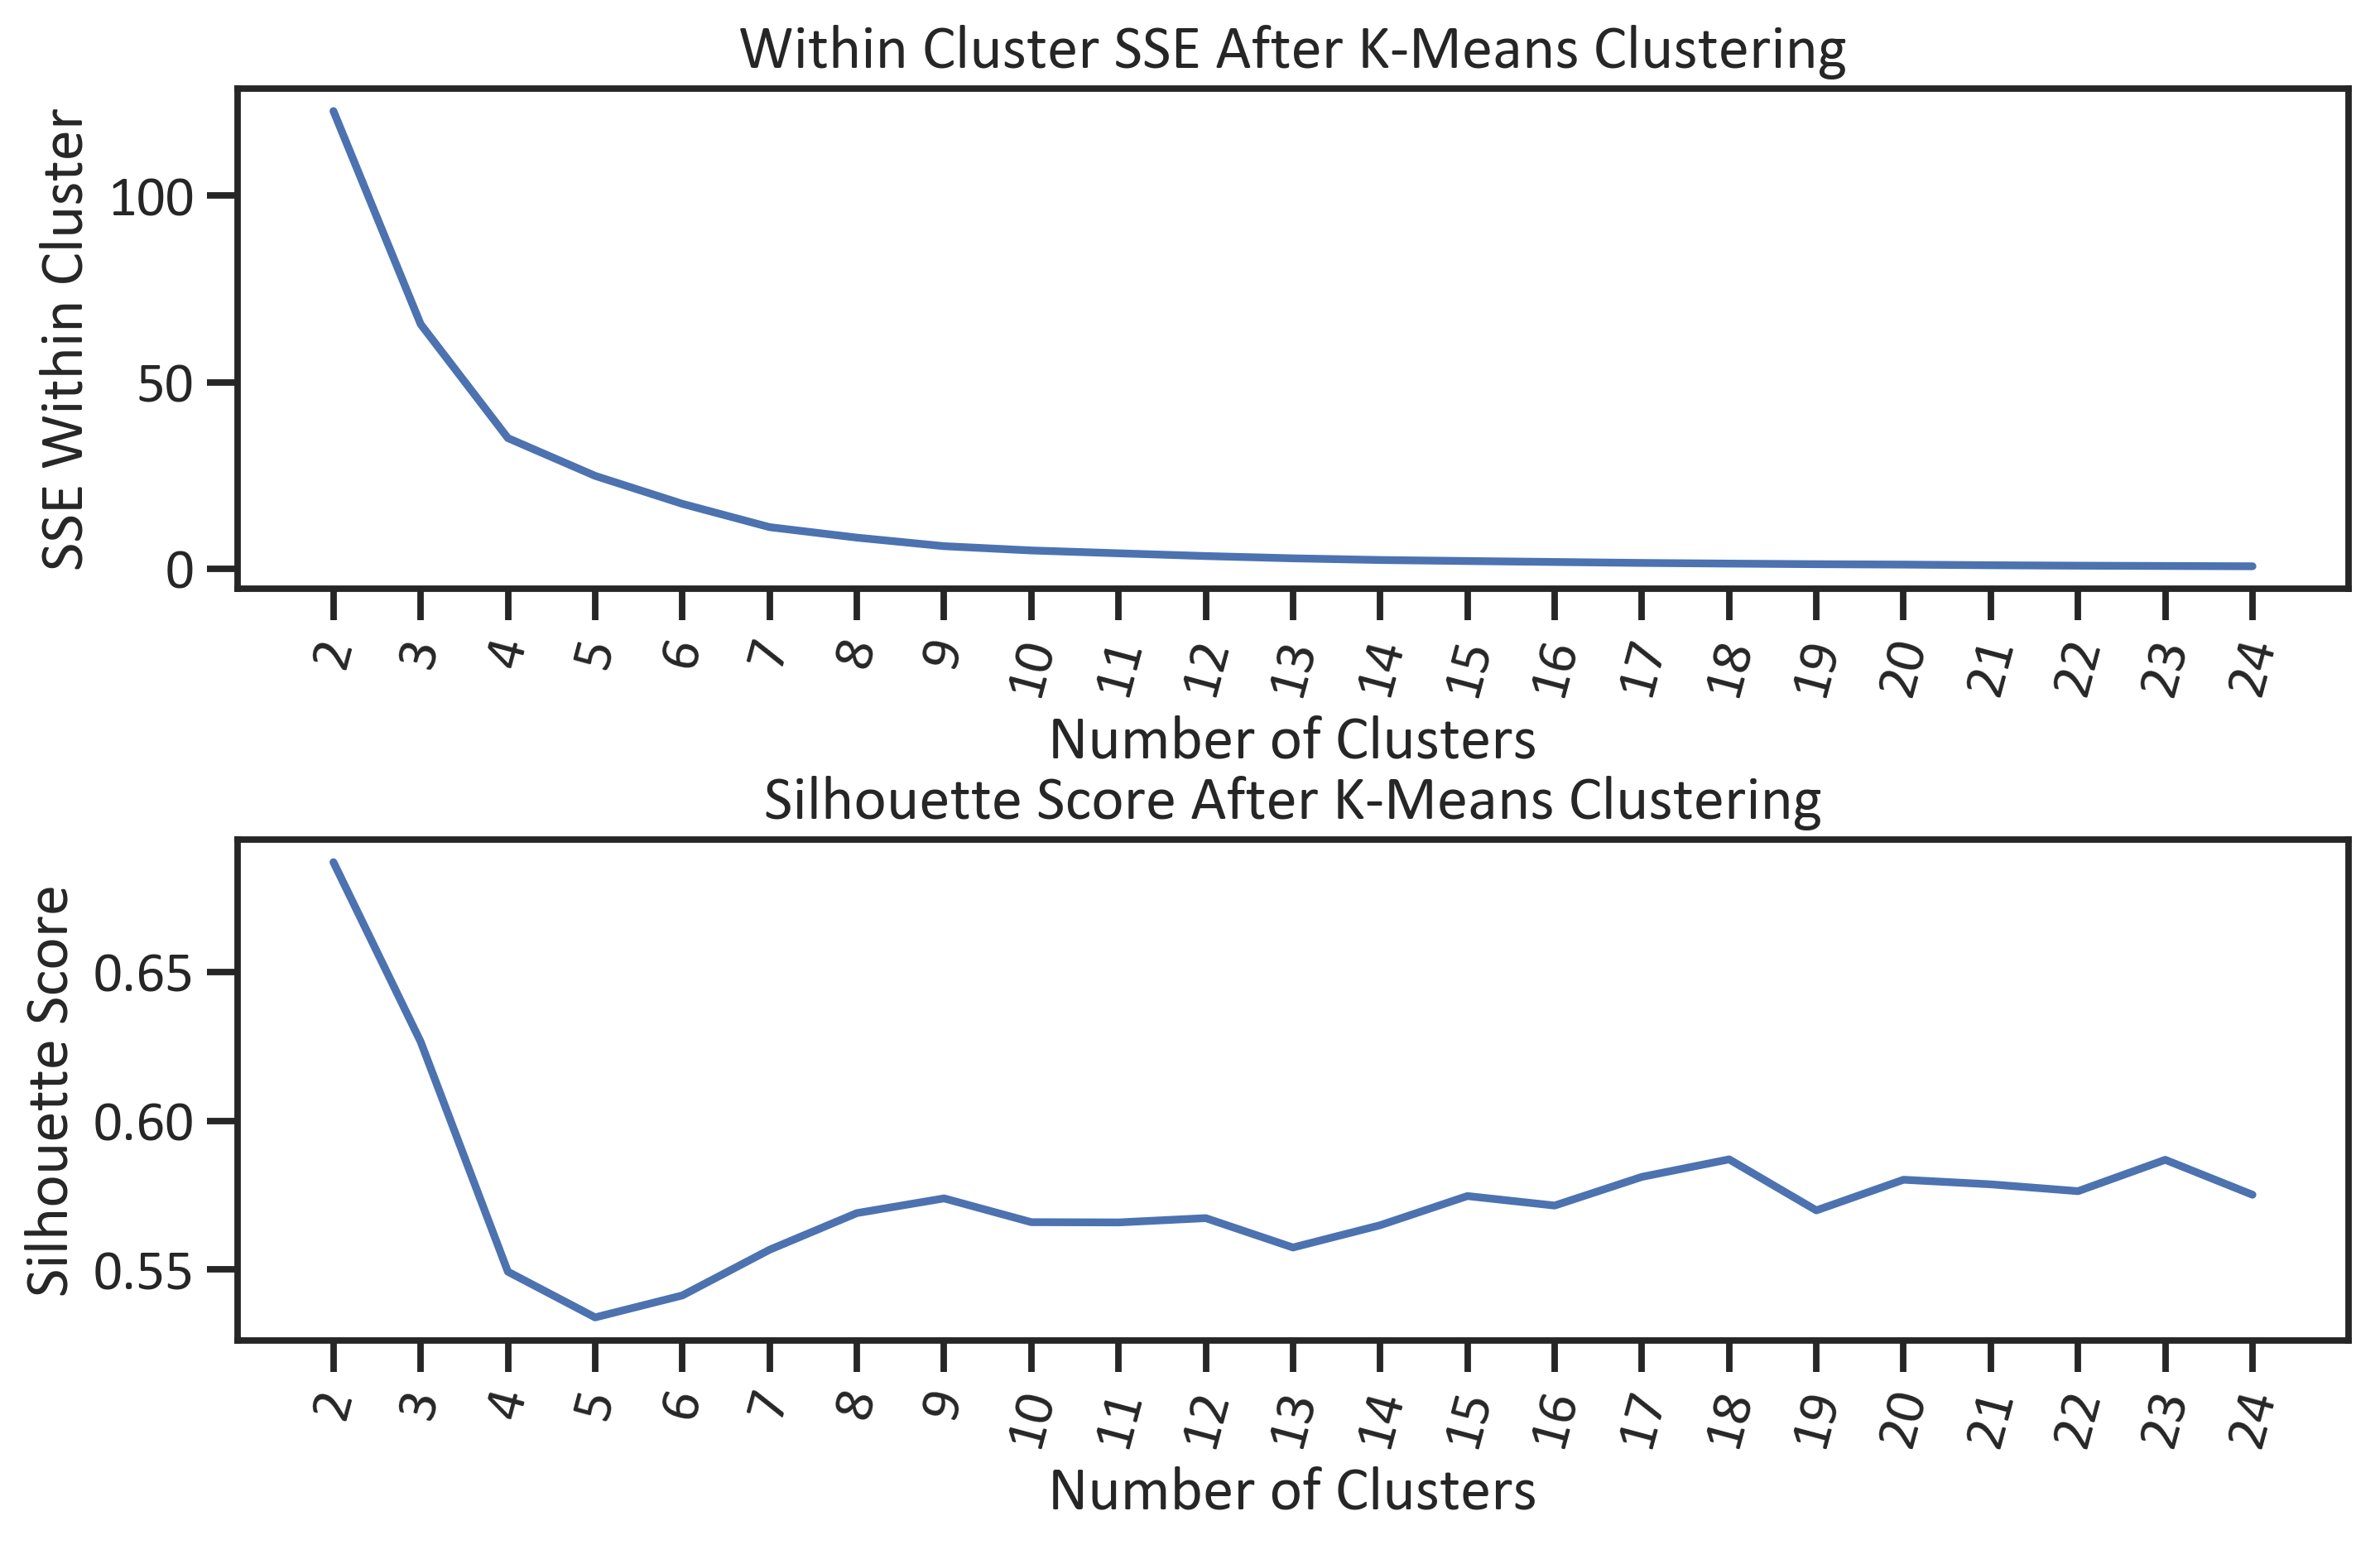

In [405]:
plot_cluster(kmeans_df, max_loop=25)

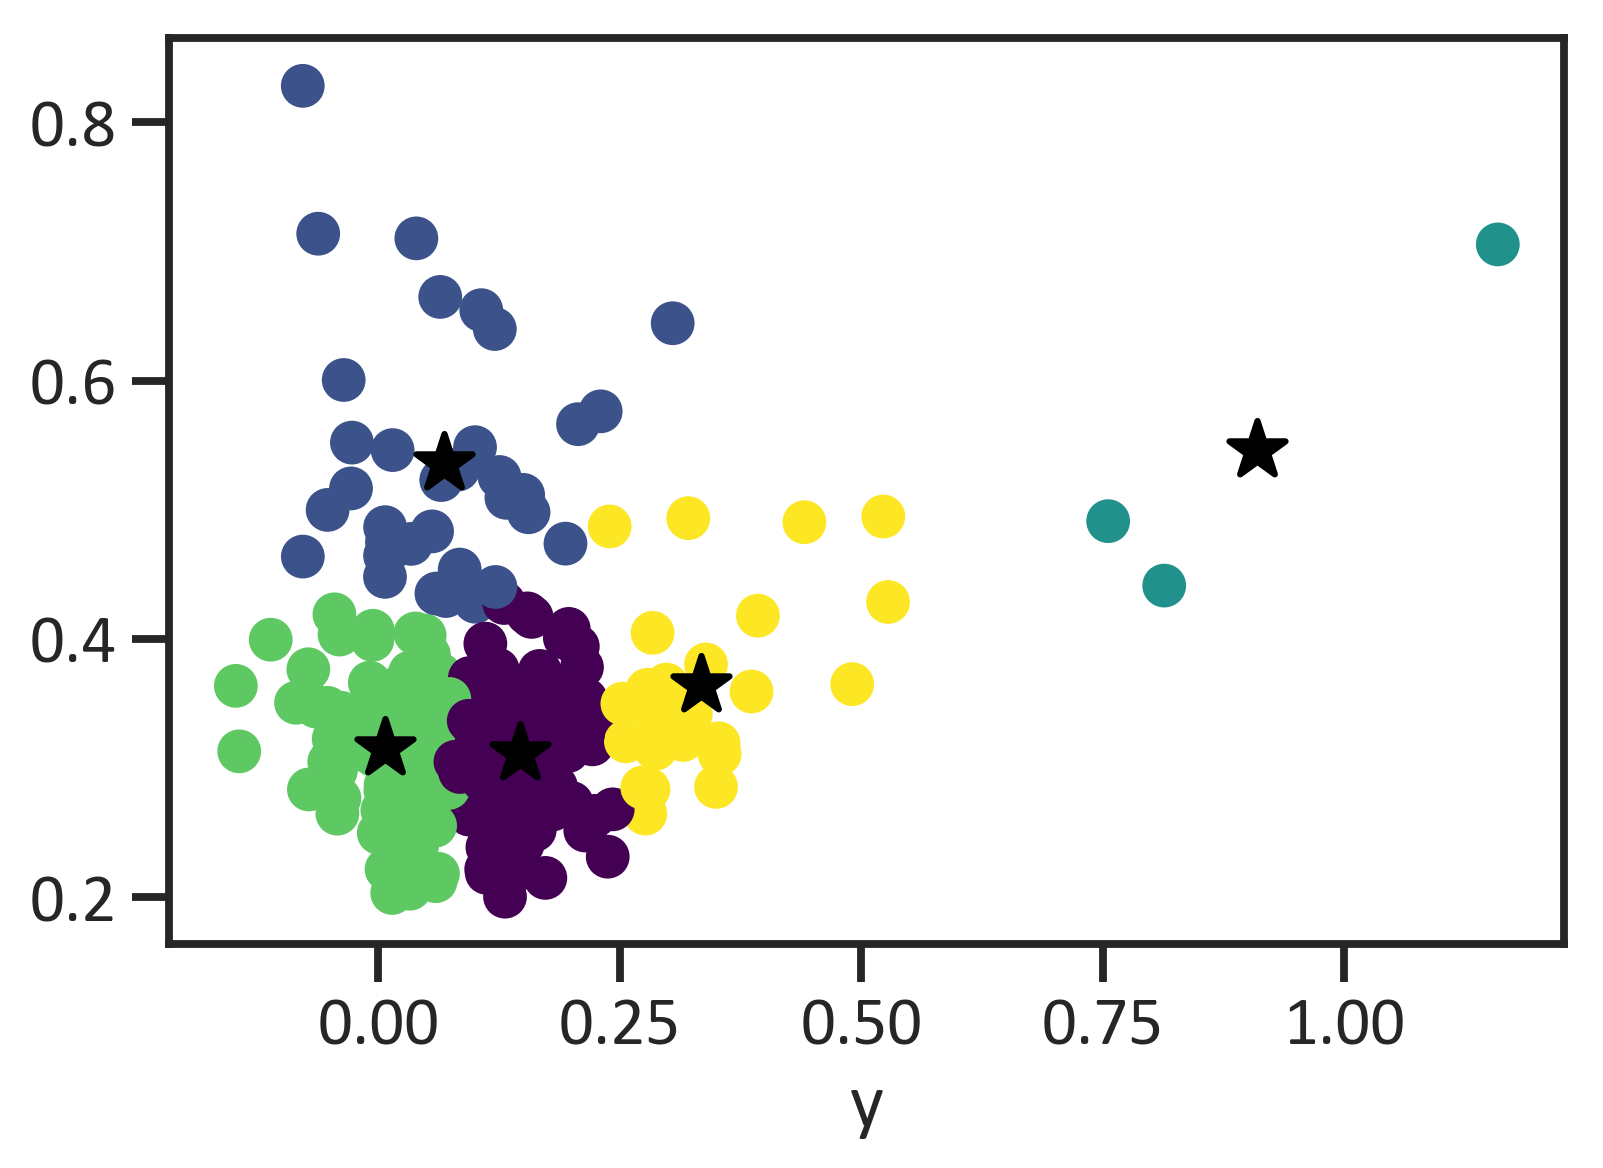

In [407]:
stdOrder = kmeans_df.sort_values('Standard Deviation',ascending=False)
first_symbol = stdOrder.index[0]
kmeans_df.drop(first_symbol,inplace=True)
X = kmeans_df.values
kmeans =KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="viridis")
plt.scatter(centroids[:,0], centroids[:,1],color="black",marker="*",s=200)
plt.xlabel("y")
plt.show()

### Notice we have one group of outliers in light green

In [408]:

stocks = pd.DataFrame(kmeans_df.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
stockClusters = pd.concat([stocks, cluster_labels],axis = 1)
stockClusters.columns = ['Symbol','Cluster']
x_df = pd.DataFrame(X, columns = ["Returns", "Volatility"])
closerv = pd.concat([stockClusters,x_df],axis=1)
closerv = closerv.set_index("Symbol")
closerv

,Cluster,Returns,Volatility
Symbol,,,
A,0,0.214164,0.251302
AAL,1,-0.062374,0.713758
AAP,0,0.082478,0.320451
AAPL,4,0.315405,0.321486
ABBV,0,0.112797,0.238342
...,...,...,...
ISRG,0,0.196036,0.312799
IT,0,0.093478,0.336323
ITW,0,0.107638,0.292603


In [409]:
from sklearn import metrics
y_predkmeans = pd.DataFrame(kmeans.predict(X))
y_predkmeans = y_predkmeans.dropna()
metrics.silhouette_score(X,y_predkmeans)

0.387038850591573

In [410]:
#creating Sharpe Ratio's for stocks
rf_rate = .05
closerv['Sharpe Ratio'] = (closerv['Returns'] - rf_rate)/closerv['Volatility']
closerv.head()

,Cluster,Returns,Volatility,Sharpe Ratio
Symbol,,,,
A,0,0.214164,0.251302,0.653254
AAL,1,-0.062374,0.713758,-0.157440
AAP,0,0.082478,0.320451,0.101352
AAPL,4,0.315405,0.321486,0.825557
ABBV,0,0.112797,0.238342,0.263475


In [411]:
closerv[closerv['Cluster'] == 0]

,Cluster,Returns,Volatility,Sharpe Ratio
Symbol,,,,
A,0,0.214164,0.251302,0.653254
AAP,0,0.082478,0.320451,0.101352
ABBV,0,0.112797,0.238342,0.263475
ABC,0,0.162097,0.291834,0.384112
ABT,0,0.152351,0.268272,0.381518
...,...,...,...,...
IR,0,0.169708,0.352068,0.340012
ISRG,0,0.196036,0.312799,0.466867
IT,0,0.093478,0.336323,0.129273


In [413]:
#Looking at Cluster Data 

In [446]:
clusters_df = closerv.groupby('Cluster').mean()
clusters_df.head()

,Returns,Volatility,Sharpe Ratio
Cluster,,,
0,0.146556,0.311040,0.316687
1,0.067416,0.535884,0.033981
2,0.909368,0.545869,1.579964
3,0.006470,0.315085,-0.135940
4,0.333855,0.364011,0.787350


In [447]:
#Selecting our 5 stocks. The stock with the highest Sharpe Ratio from each cluster
#for x in closerv['Cluster']:
    #d = closerv[closerv['Cluster'] == x].nlargest(1, 'Sharpe Ratio')
#print(d)

print(closerv[closerv['Cluster'] == 0].nlargest(1, 'Sharpe Ratio'))
print(closerv[closerv['Cluster'] == 1].nlargest(1, 'Sharpe Ratio'))
print(closerv[closerv['Cluster'] == 2].nlargest(1, 'Sharpe Ratio'))
print(closerv[closerv['Cluster'] == 3].nlargest(1, 'Sharpe Ratio'))
print(closerv[closerv['Cluster'] == 4].nlargest(1, 'Sharpe Ratio'))


        Cluster   Returns  Volatility  Sharpe Ratio
Symbol                                             
DHR           0  0.237377    0.231055      0.810962
        Cluster   Returns  Volatility  Sharpe Ratio
Symbol                                             
GPS           1  0.304653     0.64439      0.395184
        Cluster   Returns  Volatility  Sharpe Ratio
Symbol                                             
CARR          2  0.813585    0.441109      1.731058
        Cluster   Returns  Volatility  Sharpe Ratio
Symbol                                             
EXR           3  0.072498    0.284259      0.079148
        Cluster   Returns  Volatility  Sharpe Ratio
Symbol                                             
GNRC          4  0.490527    0.364739      1.207787


In [449]:
#Graphing our 5 selected stocks VS the entire stock selection
clusters_df.reset_index(inplace = True)
kmeans_df.hvplot.scatter(x = 'Standard Deviation', y = 'Returns', title= 'K-Means Cluster Chosen Stocks', xlabel = 'Volatility') * closerv[closerv['Cluster'] == 0].nlargest(1, 'Sharpe Ratio').hvplot.scatter(x = 'Volatility', y = 'Returns') * closerv[closerv['Cluster'] == 1].nlargest(1, 'Sharpe Ratio').hvplot.scatter(x = 'Volatility', y = 'Returns')* closerv[closerv['Cluster'] == 2].nlargest(1, 'Sharpe Ratio').hvplot.scatter(x = 'Volatility', y = 'Returns')* closerv[closerv['Cluster'] == 3].nlargest(1, 'Sharpe Ratio').hvplot.scatter(x = 'Volatility', y = 'Returns')* closerv[closerv['Cluster'] == 4].nlargest(1, 'Sharpe Ratio').hvplot.scatter(x = 'Volatility', y = 'Returns')

:Overlay
   .Scatter.I   :Scatter   [Standard Deviation]   (Returns)
   .Scatter.II  :Scatter   [Volatility]   (Returns)
   .Scatter.III :Scatter   [Volatility]   (Returns)
   .Scatter.IV  :Scatter   [Volatility]   (Returns)
   .Scatter.V   :Scatter   [Volatility]   (Returns)
   .Scatter.VI  :Scatter   [Volatility]   (Returns)